In [16]:
# ResNet50 을 이용한 11가지 이미지 분류
# 전이 학습 > 주로 사진 이미지 분류

In [17]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import tensorflow_hub as hub

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
md = tf.keras.Sequential([
    
  hub.KerasLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4",
                 input_shape = (400, 400, 3),
                 trainable = False),
                 Dense(11, activation = 'softmax')

])

In [19]:
md.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 2048)              58331648  
                                                                 
 dense_2 (Dense)             (None, 11)                22539     
                                                                 
Total params: 58,354,187
Trainable params: 22,539
Non-trainable params: 58,331,648
_________________________________________________________________


In [20]:
batch = 32
img_size = (400, 400)                                                           # 사이즈를 올리면 정확도는 올라가지만 학습 시간이 오래걸린다.
t_dir = "drive/MyDrive/DeepLearning/images/train/"
v_dir = "drive/MyDrive/DeepLearning/images/validation/"

tr = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1
)

trian = tr.flow_from_directory(
    t_dir, target_size = img_size, color_mode = "rgb", batch_size = batch, shuffle = True, class_mode = "categorical"
)

vl = ImageDataGenerator( rescale = 1/255 )

valid = vl.flow_from_directory(
    v_dir, target_size = img_size, color_mode = "rgb", batch_size = batch, shuffle = True, class_mode = "categorical"
)

md.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

Found 4134 images belonging to 11 classes.
Found 1036 images belonging to 11 classes.


In [21]:
hist = md.fit(trian, epochs = 8, validation_data = valid, verbose = 1)

Epoch 1/8
130/130 [==============================] - 203s 1s/step - loss: 0.7220 - accuracy: 0.7876 - val_loss: 0.3300 - val_accuracy: 0.9025
Epoch 2/8
130/130 [==============================] - 189s 1s/step - loss: 0.2522 - accuracy: 0.9284 - val_loss: 0.2699 - val_accuracy: 0.9015
Epoch 3/8
130/130 [==============================] - 189s 1s/step - loss: 0.1930 - accuracy: 0.9417 - val_loss: 0.2404 - val_accuracy: 0.9122
Epoch 4/8
130/130 [==============================] - 190s 1s/step - loss: 0.1622 - accuracy: 0.9523 - val_loss: 0.2273 - val_accuracy: 0.9151
Epoch 5/8
130/130 [==============================] - 189s 1s/step - loss: 0.1422 - accuracy: 0.9598 - val_loss: 0.2125 - val_accuracy: 0.9247
Epoch 6/8
130/130 [==============================] - 187s 1s/step - loss: 0.1271 - accuracy: 0.9608 - val_loss: 0.2041 - val_accuracy: 0.9315
Epoch 7/8
130/130 [==============================] - 188s 1s/step - loss: 0.1134 - accuracy: 0.9661 - val_loss: 0.1949 - val_accuracy: 0.9353
Epoch 

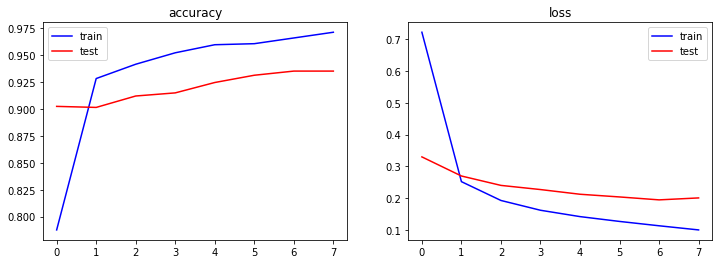

In [22]:
accuracy = hist.history['accuracy']         # 그래프 그리기
val_accuracy = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

pl.figure(figsize = (12,4))

pl.subplot(1, 2, 1)
pl.plot(accuracy, 'b-', label="train")
pl.plot(val_accuracy, 'r-', label="test")
pl.legend()
pl.title('accuracy')

pl.subplot(1, 2, 2)
pl.plot(loss, 'b-', label="train")
pl.plot(val_loss, 'r-', label="test")
pl.legend()
pl.title('loss')

pl.show()

33/33 [==============================] - 24s 689ms/step


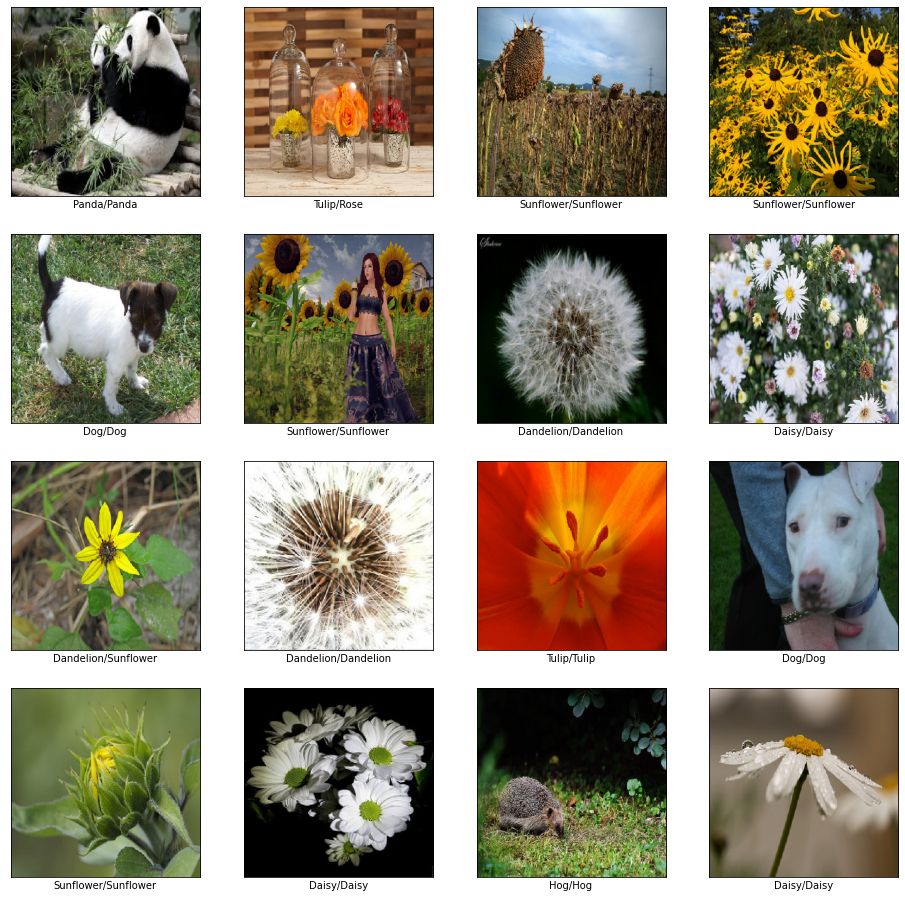

In [23]:
cn = ['Bear', 'Cat', 'Dog', 'Hog', 'Panda', 'Tiger', 'Daisy', 'Dandelion', 'Rose', 'Sunflower', 'Tulip']

cn.sort()

val, lbl_batch = next(iter(valid))
pred = md.predict(valid)
pred = np.argmax(pred, axis = 1)

pl.figure(figsize = (16, 16))

for i in range(16):

  pl.subplot(4, 4, i+1)
  pl.imshow(val[i])
  pl.xticks(ticks = [])
  pl.yticks(ticks = [])

  an = cn[pred[i]]
  y = cn[np.argmax(lbl_batch[i])]

  lbl = an + "/" + y

  pl.xlabel(lbl)

pl.show()